# **Exercise 1: HOG (Histogram of Oriented Gradients) Object Detection**

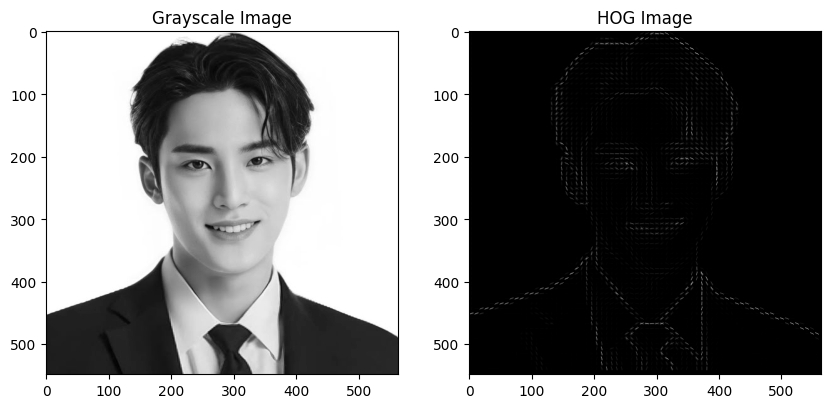

In [1]:
import cv2
from skimage.feature import hog
import matplotlib.pyplot as plt

image = cv2.imread('mingyu.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)



hog_features, hog_image = hog(
    gray_image,
    orientations=9,
    pixels_per_cell=(8, 8),
    cells_per_block=(2, 2),
    block_norm='L2-Hys',
    visualize=True,
    feature_vector=True,
)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')

plt.subplot(1, 2, 2)
plt.imshow(hog_image, cmap='gray')
plt.title('HOG Image')

plt.show()

# **Exercise 2: YOLO (You Only Look Once) Object Detection**

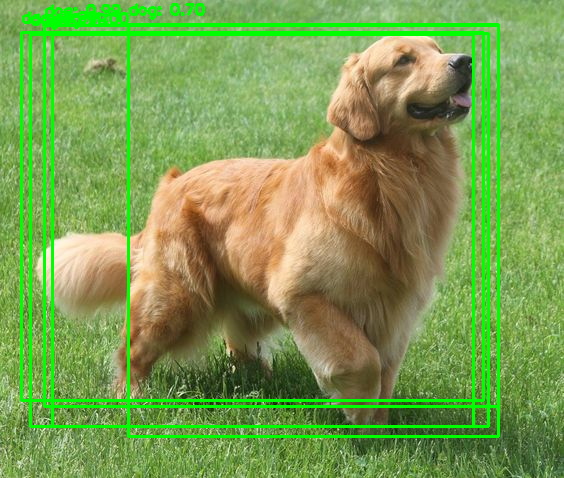

In [7]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
layer_names = net.getLayerNames()

output_layers = [layer_names[i - 1] for i in net.getUnconnectedOutLayers()]

with open('coco.names', 'r') as f:
    classes = [line.strip() for line in f.readlines()]

image = cv2.imread('dog.jpg')
height, width, channels = image.shape

blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
net.setInput(blob)
outs = net.forward(output_layers)

for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.7:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

            label = f"{classes[class_id]}: {confidence:.2f}"
            cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

cv2_imshow(image)

# **Exercise 3: SSD (Single Shot MultiBox Detector) with TensorFlow**

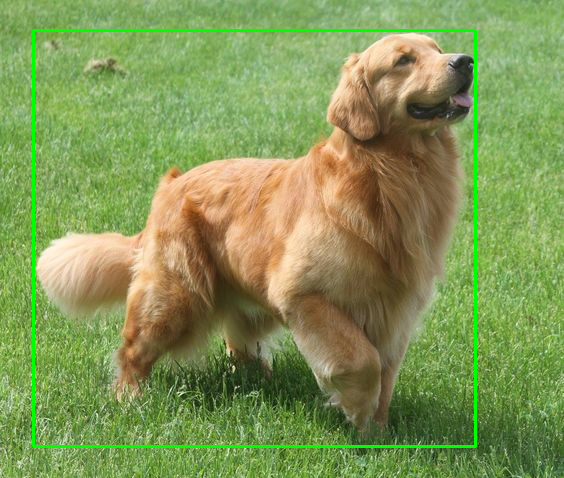

In [11]:
import tensorflow as tf
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

model = tf.saved_model.load('ssd_mobilenet_v2_coco_2018_03_29/saved_model')

def run_inference_for_single_image(model, image):
    input_tensor = tf.convert_to_tensor(image)
    input_tensor = input_tensor[tf.newaxis, ...]

    output_dict = model.signatures['serving_default'](input_tensor)

    return output_dict

image_path = 'dog.jpg'
image_np = cv2.imread(image_path)

detections = run_inference_for_single_image(model, image_np)

num_detections = int(detections.pop('num_detections'))
detections = {key:value[0, :num_detections].numpy()
              for key,value in detections.items()}
detections['num_detections'] = num_detections

image_np_with_detections = image_np.copy()
for i in range(num_detections):
    if detections['detection_scores'][i] > 0.5:
        ymin, xmin, ymax, xmax = detections['detection_boxes'][i]
        (left, right, top, bottom) = (xmin * image_np.shape[1], xmax * image_np.shape[1], ymin * image_np.shape[0], ymax * image_np.shape[0])
        cv2.rectangle(image_np_with_detections, (int(left), int(top)), (int(right), int(bottom)), (0, 255, 0), 2)

cv2_imshow(image_np_with_detections)